# Day 08. Exercise 05
# Clustering

## 0. Imports

In [79]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [80]:
df = pd.read_csv('../dataset/regression.csv', index_col='uid')
df.drop(columns='pageviews', axis=1, inplace=True)
df

,num_commits,AVG(diff)
uid,,
user_1,62,-64.400000
user_10,20,-74.800000
user_14,61,-159.000000
user_17,51,-61.600000
user_18,5,-5.666667
user_19,118,-98.750000
user_21,65,-95.500000
user_25,79,-92.600000
user_28,60,-86.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

Алгоритм K-means работает следующим образом:

Инициализация: Случайным образом выбираются k точек данных (центроиды), которые будут служить начальными центрами кластеров.
Назначение кластера: Каждую точку данных присваивают ближайшему центроиду, основываясь на расстоянии до него (обычно используется Евклидово расстояние).
Пересчет центров: Для каждого кластера вычисляется новый центр как среднее значение всех точек, принадлежащих этому кластеру.
Повторение шагов 2 и 3 до тех пор, пока центры кластеров не перестанут изменяться или пока количество итераций не достигнет заданного предела

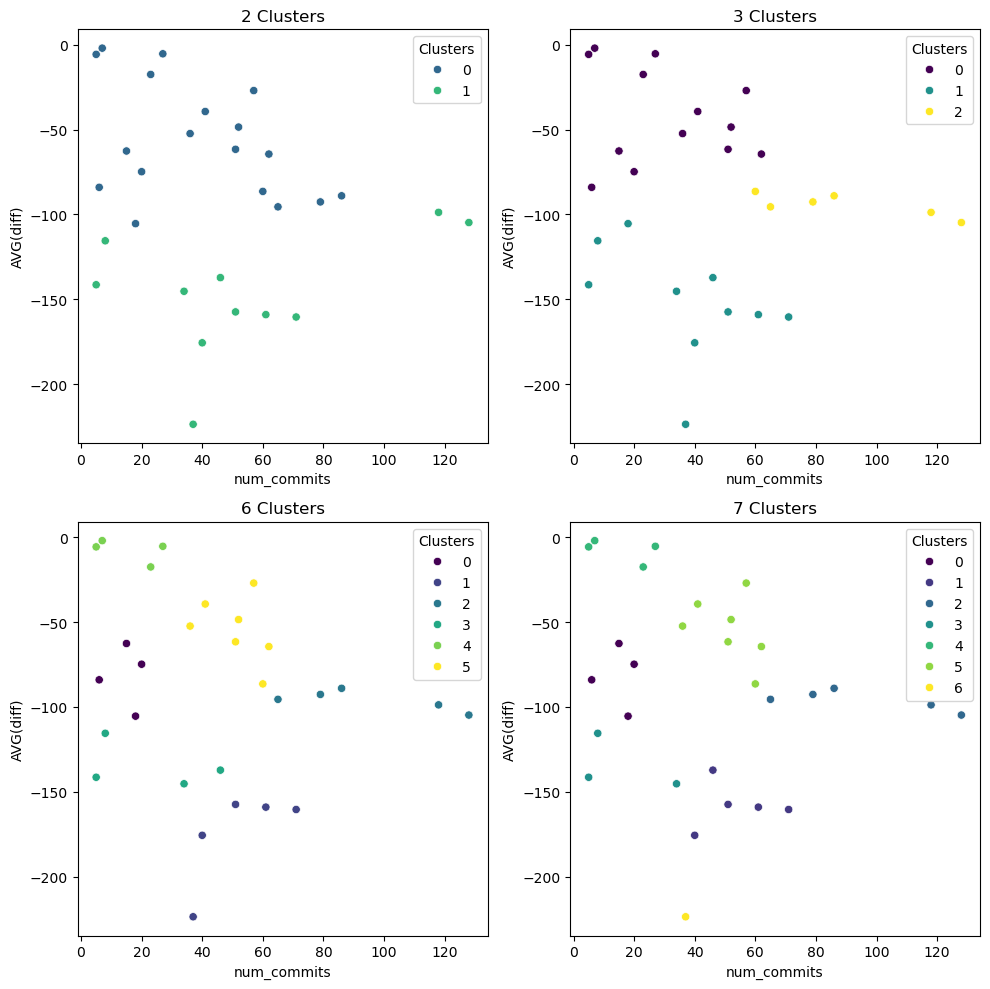

In [81]:
import warnings
warnings.filterwarnings('ignore')
n_clusters_list = [2, 3, 6, 7]

def plot_kmeans_clusters(n_clusters, ax):
    km = KMeans(n_clusters=n_clusters, random_state=21)
    y_pred = km.fit_predict(df[['num_commits', 'AVG(diff)']])
    df['Clusters'] = y_pred
    sns.scatterplot(data=df, x='num_commits', y='AVG(diff)', hue='Clusters', ax=ax, palette='viridis')
    ax.set_title(f'{n_clusters} Clusters')

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i, n_clusters in enumerate(n_clusters_list):
    plot_kmeans_clusters(n_clusters, axes[i])

plt.tight_layout()
plt.show()

In [82]:
df = df[['num_commits', 'AVG(diff)']]
for i in range(2,9):
    labels=KMeans(n_clusters=i,random_state=21).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df,labels,random_state=21)))

Silhouette score for k(clusters) = 2 is 0.4194920562377423
Silhouette score for k(clusters) = 3 is 0.4454402135233297
Silhouette score for k(clusters) = 4 is 0.41503879936268956
Silhouette score for k(clusters) = 5 is 0.3521030626149593
Silhouette score for k(clusters) = 6 is 0.3954350435152892
Silhouette score for k(clusters) = 7 is 0.39637476619843964
Silhouette score for k(clusters) = 8 is 0.48638087320227846


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это метод кластеризации данных, основанный на плотности точек. Он используется для нахождения групп объектов (кластеров), основываясь на том, насколько плотно расположены точки данных друг к другу. В отличие от других методов кластеризации, таких как K-means, DBSCAN может находить кластеры произвольной формы и автоматически обнаруживать выбросы (шумовые точки).

In [83]:
X = df[['num_commits', 'AVG(diff)']].values

def plot_dbscan_results(X, eps, min_samples, title):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    
    labels = db.labels_
    silhouette_avg = silhouette_score(X, labels)
    print("Silhouette Score:", silhouette_avg)
    
    unique_labels = set(db.labels_)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Черный цвет для шума
        
        class_member_mask = db.labels_ == k
        
        xy = X[class_member_mask & core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolors='k', s=140, label=f'Cluster {k}')
        
        xy = X[class_member_mask & ~core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1], c=[col], edgecolors='k', s=60, label=f'Noise {k}')
    
    return fig, ax

Silhouette Score: 0.19881722125199422


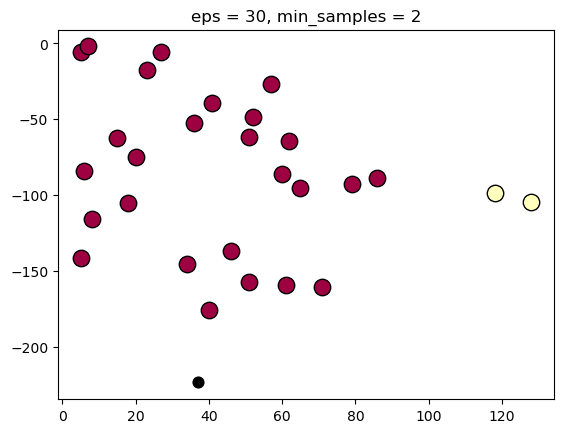

In [84]:
fig, ax = plot_dbscan_results(X, eps=30, min_samples=2, title='eps = 30, min_samples = 2')
plt.show()

Silhouette Score: 0.38339641455696616


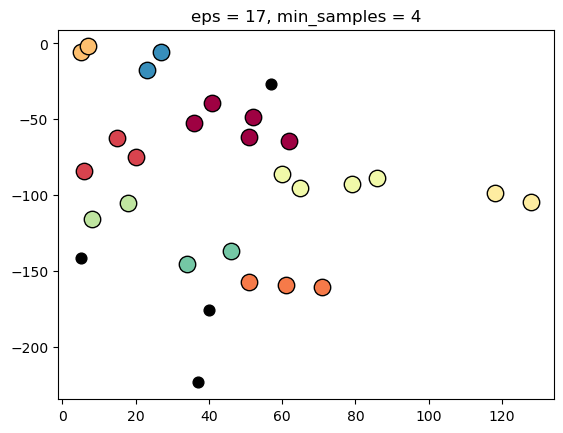

In [85]:
fig, ax = plot_dbscan_results(X, eps=17, min_samples=2, title='eps = 17, min_samples = 4')
plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [86]:
model = AgglomerativeClustering(n_clusters=5)
labels = model.fit_predict(X)

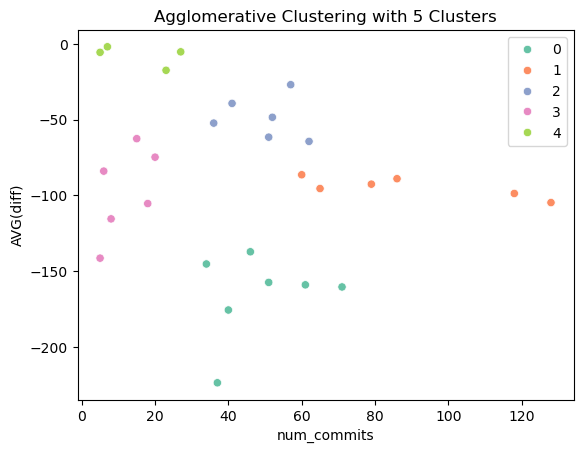

In [87]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set2")
plt.title("Agglomerative Clustering with 5 Clusters")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.show()

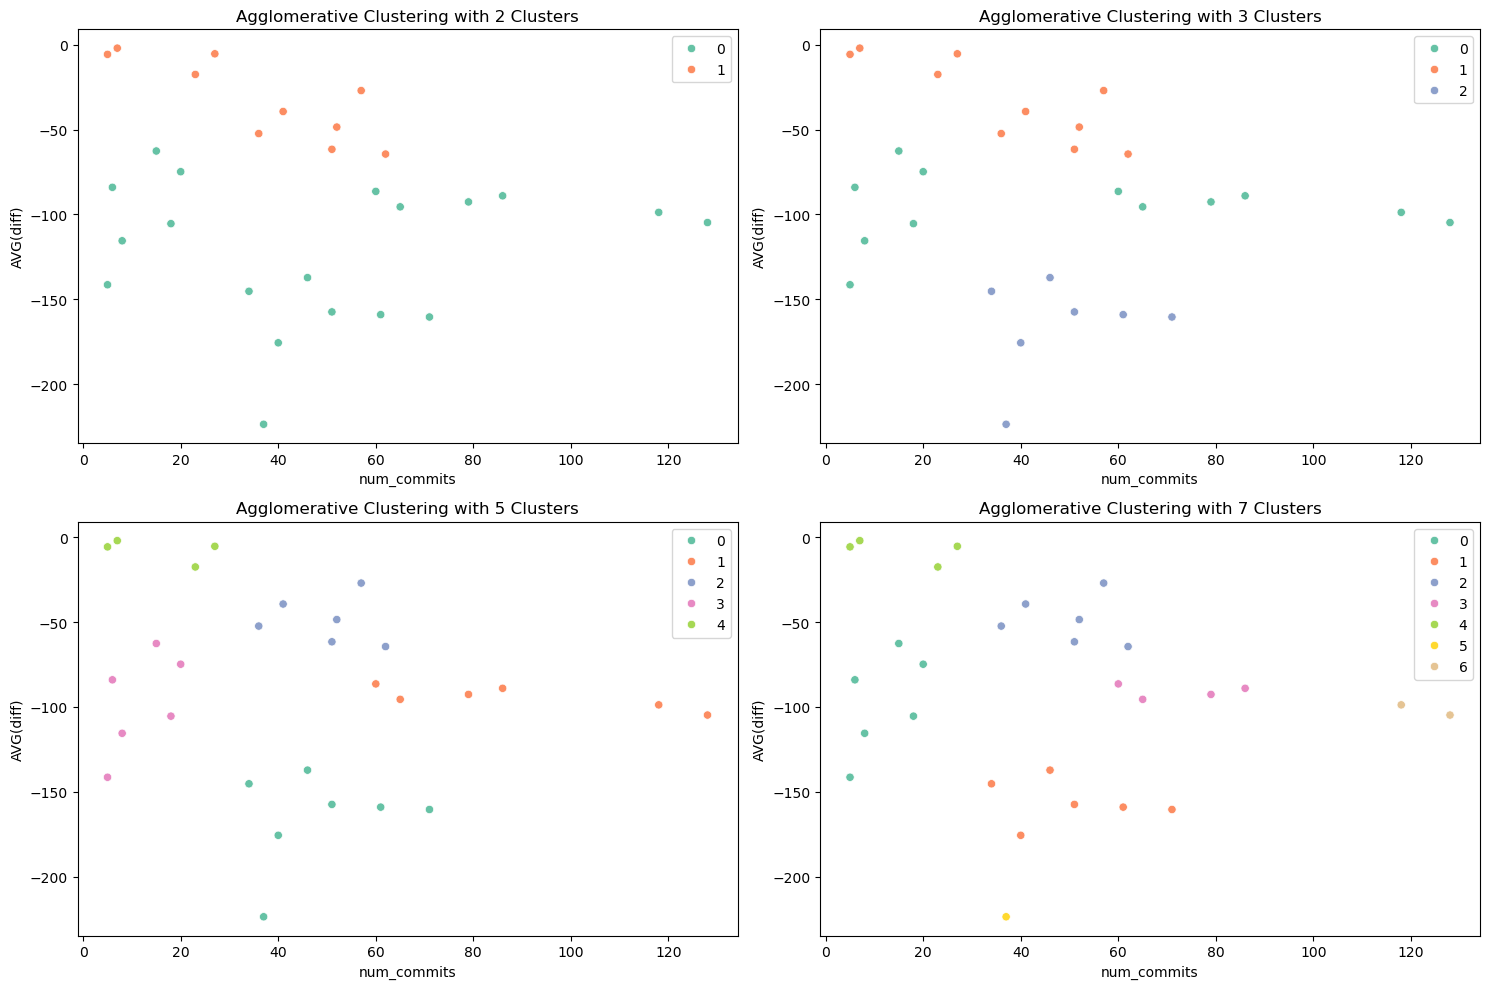

In [88]:
n_clusters_list = [2, 3, 5, 7]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, n_clusters in enumerate(n_clusters_list):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Agglomerative Clustering with {n_clusters} Clusters")
    axes[i].set_xlabel("num_commits")
    axes[i].set_ylabel("AVG(diff)")

plt.tight_layout()
plt.show()

In [89]:
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4865808853184314


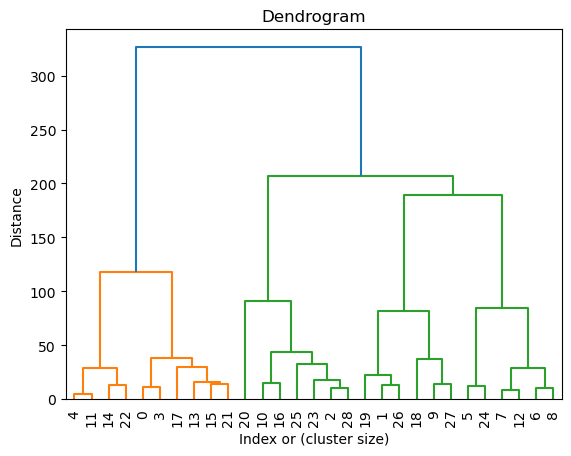

In [90]:
linked = linkage(X, method='ward')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., show_contracted=True)
plt.title("Dendrogram")
plt.xlabel("Index or (cluster size)")
plt.ylabel("Distance")
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [93]:
def optimize_clastering_parameter(model_class, params, param_name, param_range):

    scores = []
    best_param_value = None
    best_silhouette_score = -1

    for value in param_range:
        params.update({param_name : value})

        model = model_class(**params)

        labels = model.fit_predict(X)

        silhouette_avg = silhouette_score(X, labels)

        scores.append(silhouette_avg)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_param_value = value

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(param_range, scores, marker='o')
    plt.title(f'Silhouette Score vs {param_name.capitalize()} Value')
    plt.xlabel(param_name.capitalize())
    plt.ylabel('Silhouette Score')

    params.update({param_name: best_param_value})
    model = model_class(**params)
    labels = model.fit_predict(X)

    plt.subplot(122)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set2")
    plt.title(f'Best {param_name} Value: {best_param_value}')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

    return best_param_value, best_silhouette_score

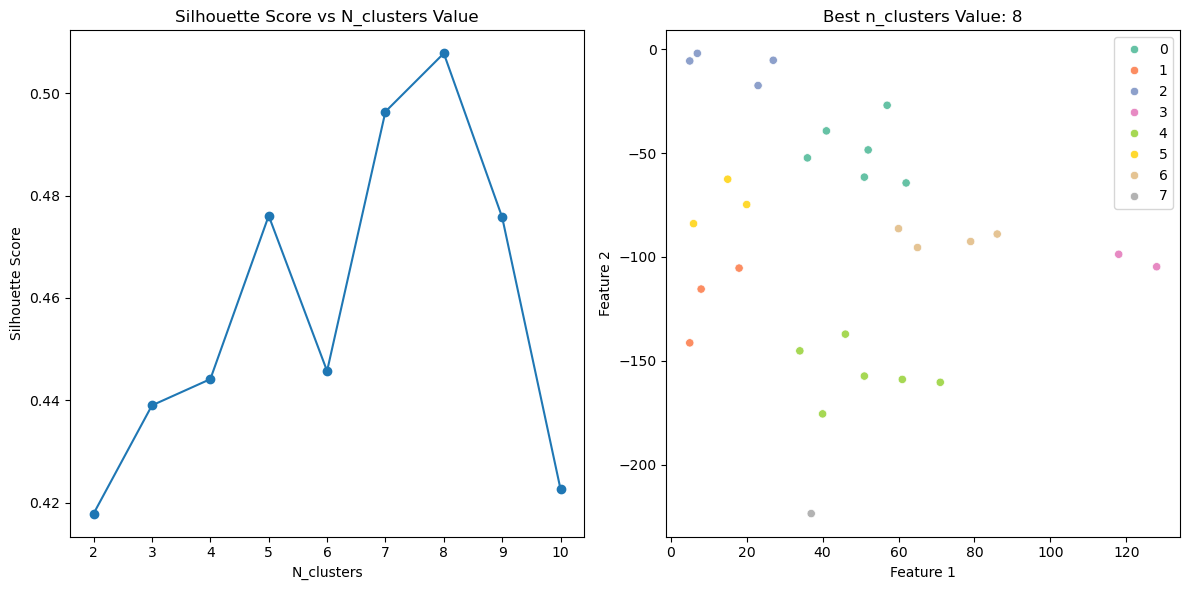

(8, 0.50779855565622)

In [94]:
params = {
    'random_state': 21,
    'n_init': 10
}
param_range = list(range(2, 11))

optimize_clastering_parameter(KMeans, params, 'n_clusters', param_range)